In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Valgt data: et klipp av Anders som kjører normalt og et klipp av Elisabeth som tullekjører. Det ses på 5 sekunders seksjon av kjøreturen som cirka skal være på samme tidspunkt.

In [2]:
normal_ad = pd.read_csv('67.csv')
print(normal_ad.shape)
tull_e = pd.read_csv('76.csv')
print(tull_e.shape)

(26954, 5)
(53616, 5)


In [3]:
normal_ad = normal_ad.loc[13000:14000:]

In [4]:
tull_e = tull_e.loc[19800:20800:]

In [5]:
f = 4

In [6]:
normal_ad.head(1)

,date,Accelerometer (z) [m/s2],Accelerometer (x) [m/s2],Accelerometer (y) [m/s2],temperature [°C]
13000,2021-02-24T08:20:10.550Z,25.80622,-4.667464,-25.906699,25


In [7]:
normal_ad = normal_ad.reset_index()

In [8]:
normal_ad = normal_ad.drop('index', axis=1)

In [9]:
tull_e = tull_e.reset_index()

In [10]:
tull_e = tull_e.drop('index', axis=1)

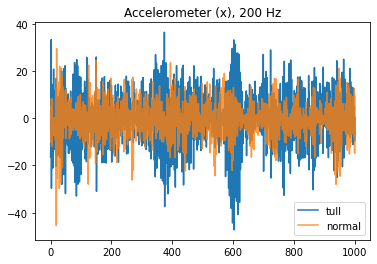

In [11]:
plt.plot(tull_e['Accelerometer (x) [m/s2]'], label='tull')
plt.plot(normal_ad['Accelerometer (x) [m/s2]'], label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (x), 200 Hz')
plt.show()

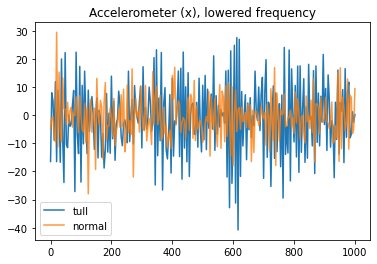

In [12]:
plt.plot(tull_e['Accelerometer (x) [m/s2]'][::f], label='tull')
plt.plot(normal_ad['Accelerometer (x) [m/s2]'][::f], label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (x), lowered frequency')
plt.show()

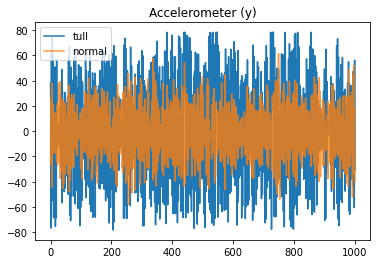

In [13]:
plt.plot(tull_e['Accelerometer (y) [m/s2]'], label='tull')
plt.plot(normal_ad['Accelerometer (y) [m/s2]'], label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (y)')
plt.show()

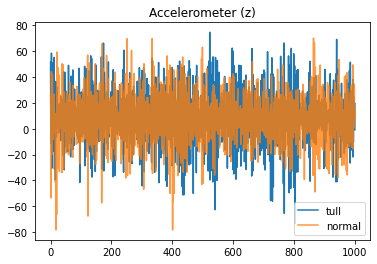

In [14]:
plt.title('Accelerometer (z)')
plt.plot(tull_e['Accelerometer (z) [m/s2]'], label='tull')
plt.plot(normal_ad['Accelerometer (z) [m/s2]'], label='normal', alpha=0.8)
plt.legend()
plt.show()

## Z-transformation ##

In [15]:
normal_ad.head(1)

,date,Accelerometer (z) [m/s2],Accelerometer (x) [m/s2],Accelerometer (y) [m/s2],temperature [°C]
0,2021-02-24T08:20:10.550Z,25.80622,-4.667464,-25.906699,25


In [16]:
normal_acc_z_mean = normal_ad['Accelerometer (z) [m/s2]'].mean()
normal_acc_z_std = normal_ad['Accelerometer (z) [m/s2]'].std()

In [17]:
normal_acc_x_mean = normal_ad['Accelerometer (x) [m/s2]'].mean()
normal_acc_x_std = normal_ad['Accelerometer (x) [m/s2]'].std()

In [18]:
normal_acc_y_mean = normal_ad['Accelerometer (y) [m/s2]'].mean()
normal_acc_y_std = normal_ad['Accelerometer (y) [m/s2]'].std()

In [19]:
normal_ad['Acc(z)_z_trans'] = (normal_ad['Accelerometer (z) [m/s2]']-normal_acc_z_mean)/normal_acc_z_std
normal_ad['Acc(x)_z_trans'] = (normal_ad['Accelerometer (x) [m/s2]']-normal_acc_x_mean)/normal_acc_x_std
normal_ad['Acc(y)_z_trans'] = (normal_ad['Accelerometer (y) [m/s2]']-normal_acc_y_mean)/normal_acc_y_std

In [20]:
tull_acc_z_mean = tull_e['Accelerometer (z) [m/s2]'].mean()
tull_acc_z_std = tull_e['Accelerometer (z) [m/s2]'].std()

In [21]:
tull_acc_x_mean = tull_e['Accelerometer (x) [m/s2]'].mean()
tull_acc_x_std = tull_e['Accelerometer (x) [m/s2]'].std()

In [22]:
tull_acc_y_mean = tull_e['Accelerometer (y) [m/s2]'].mean()
tull_acc_y_std = tull_e['Accelerometer (y) [m/s2]'].std()

In [23]:
tull_e['Acc(z)_z_trans'] = (tull_e['Accelerometer (z) [m/s2]']-tull_acc_z_mean)/tull_acc_z_std
tull_e['Acc(x)_z_trans'] = (tull_e['Accelerometer (x) [m/s2]']-tull_acc_x_mean)/tull_acc_x_std
tull_e['Acc(y)_z_trans'] = (tull_e['Accelerometer (y) [m/s2]']-tull_acc_y_mean)/tull_acc_y_std

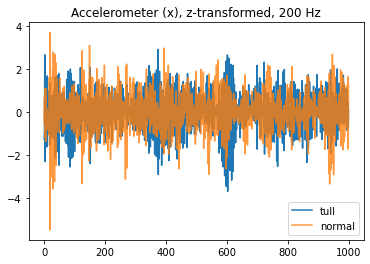

In [24]:
plt.plot(tull_e['Acc(x)_z_trans'], label='tull')
plt.plot(normal_ad['Acc(x)_z_trans'], label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (x), z-transformed, 200 Hz')
plt.show()

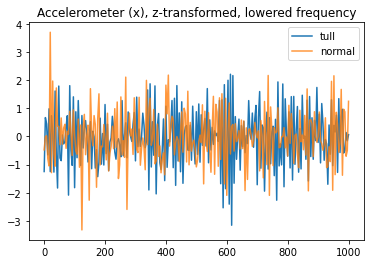

In [25]:
plt.plot(tull_e['Acc(x)_z_trans'][::f], label='tull')
plt.plot(normal_ad['Acc(x)_z_trans'][::f], label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (x), z-transformed, lowered frequency')
plt.show()

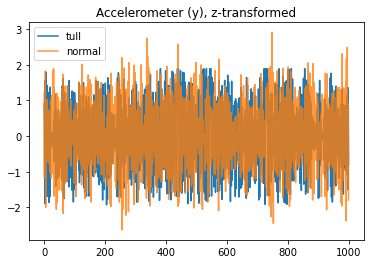

In [26]:
plt.plot(tull_e['Acc(y)_z_trans'], label='tull')
plt.plot(normal_ad['Acc(y)_z_trans'], label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (y), z-transformed')
plt.show()

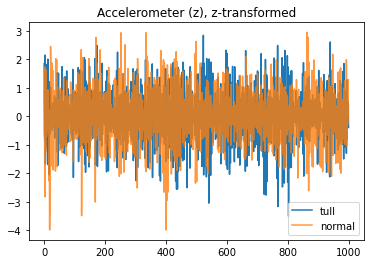

In [27]:
plt.plot(tull_e['Acc(z)_z_trans'], label='tull')
plt.plot(normal_ad['Acc(z)_z_trans'], label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (z), z-transformed')
plt.show()

## Rolling window ##

In [28]:
normal_x_roll_20 = normal_ad['Accelerometer (x) [m/s2]'].rolling(20).mean()
tull_x_roll_20 = tull_e['Accelerometer (x) [m/s2]'].rolling(20).mean()

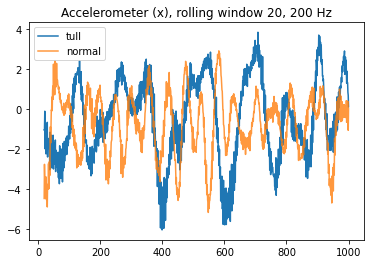

In [29]:
plt.plot(tull_x_roll_20, label='tull')
plt.plot(normal_x_roll_20, label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (x), rolling window 20, 200 Hz')
plt.show()

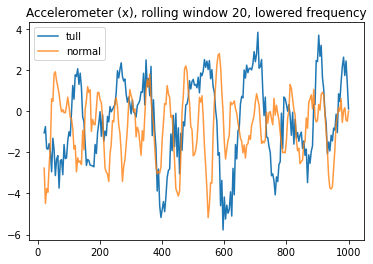

In [30]:
plt.plot(tull_x_roll_20[::f], label='tull')
plt.plot(normal_x_roll_20[::f], label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (x), rolling window 20, lowered frequency')
plt.show()

In [31]:
normal_x_roll_50 = normal_ad['Accelerometer (x) [m/s2]'].rolling(50).mean()
tull_x_roll_50 = tull_e['Accelerometer (x) [m/s2]'].rolling(50).mean()

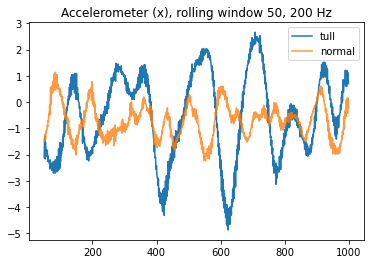

In [32]:
plt.plot(tull_x_roll_50, label='tull')
plt.plot(normal_x_roll_50, label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (x), rolling window 50, 200 Hz')
plt.show()

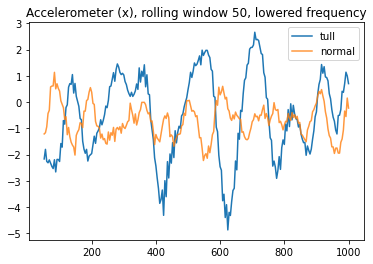

In [33]:
plt.plot(tull_x_roll_50[::f], label='tull')
plt.plot(normal_x_roll_50[::f], label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (x), rolling window 50, lowered frequency')
plt.show()

In [34]:
normal_y_roll_20 = normal_ad['Accelerometer (y) [m/s2]'].rolling(20).mean()
tull_y_roll_20 = tull_e['Accelerometer (y) [m/s2]'].rolling(20).mean()

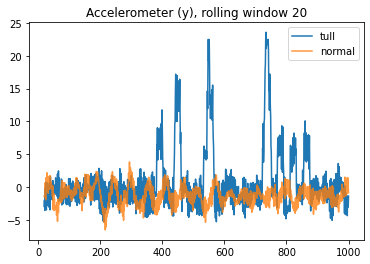

In [35]:
plt.plot(tull_y_roll_20, label='tull')
plt.plot(normal_y_roll_20, label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (y), rolling window 20')
plt.show()

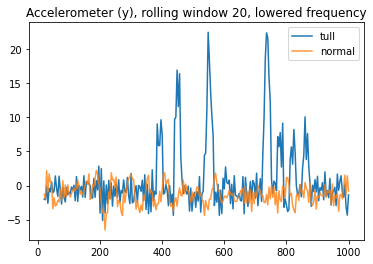

In [36]:
plt.plot(tull_y_roll_20[::f], label='tull')
plt.plot(normal_y_roll_20[::f], label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (y), rolling window 20, lowered frequency')
plt.show()

In [37]:
normal_y_roll_50 = normal_ad['Accelerometer (y) [m/s2]'].rolling(50).mean()
tull_y_roll_50 = tull_e['Accelerometer (y) [m/s2]'].rolling(50).mean()

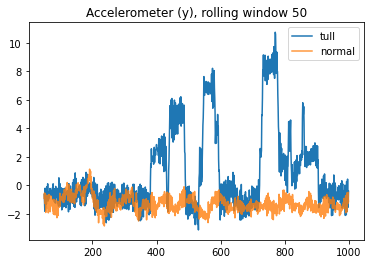

In [38]:
plt.plot(tull_y_roll_50, label='tull')
plt.plot(normal_y_roll_50, label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (y), rolling window 50')
plt.show()

In [39]:
normal_z_roll_20 = normal_ad['Accelerometer (z) [m/s2]'].rolling(20).mean()
tull_z_roll_20 = tull_e['Accelerometer (z) [m/s2]'].rolling(20).mean()

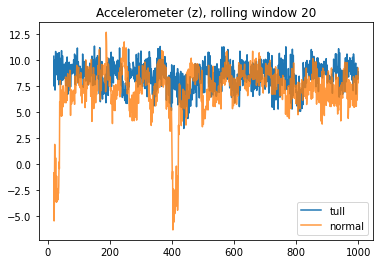

In [40]:
plt.plot(tull_z_roll_20, label='tull')
plt.plot(normal_z_roll_20, label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (z), rolling window 20')
plt.show()

In [41]:
normal_z_roll_50 = normal_ad['Accelerometer (z) [m/s2]'].rolling(50).mean()
tull_z_roll_50 = tull_e['Accelerometer (z) [m/s2]'].rolling(50).mean()

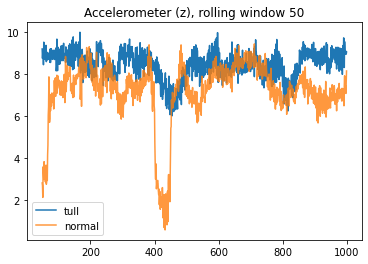

In [42]:
plt.plot(tull_z_roll_50, label='tull')
plt.plot(normal_z_roll_50, label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (z), rolling window 50')
plt.show()

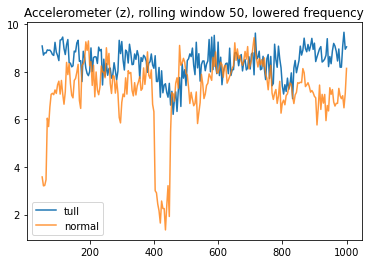

In [43]:
plt.plot(tull_z_roll_50[::f], label='tull')
plt.plot(normal_z_roll_50[::f], label='normal', alpha=0.8)
plt.legend()
plt.title('Accelerometer (z), rolling window 50, lowered frequency')
plt.show()